In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("datasets/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:

data.rename(columns={             #renaming for better understanding 
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)

print(data.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'NumMajorVessels', 'Thalassemia', 'HeartDisease'],
      dtype='object')


In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
missing_counts = data.isna().sum()


if missing_counts.sum()==0:
    print("No missing values found ")
else:
    print(missing_counts)    

No missing values found 


In [7]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
if "HeartDisease" in data.columns:
    print("Target counts:\n")
    print(data["HeartDisease"].value_counts())
    print("\nTarget ratio\n")
    print(data["HeartDisease"].value_counts(normalize=True).round(3))
else:
    raise KeyError("Column 'target' not found in dataset")    

Target counts:

HeartDisease
1    526
0    499
Name: count, dtype: int64

Target ratio

HeartDisease
1    0.513
0    0.487
Name: proportion, dtype: float64


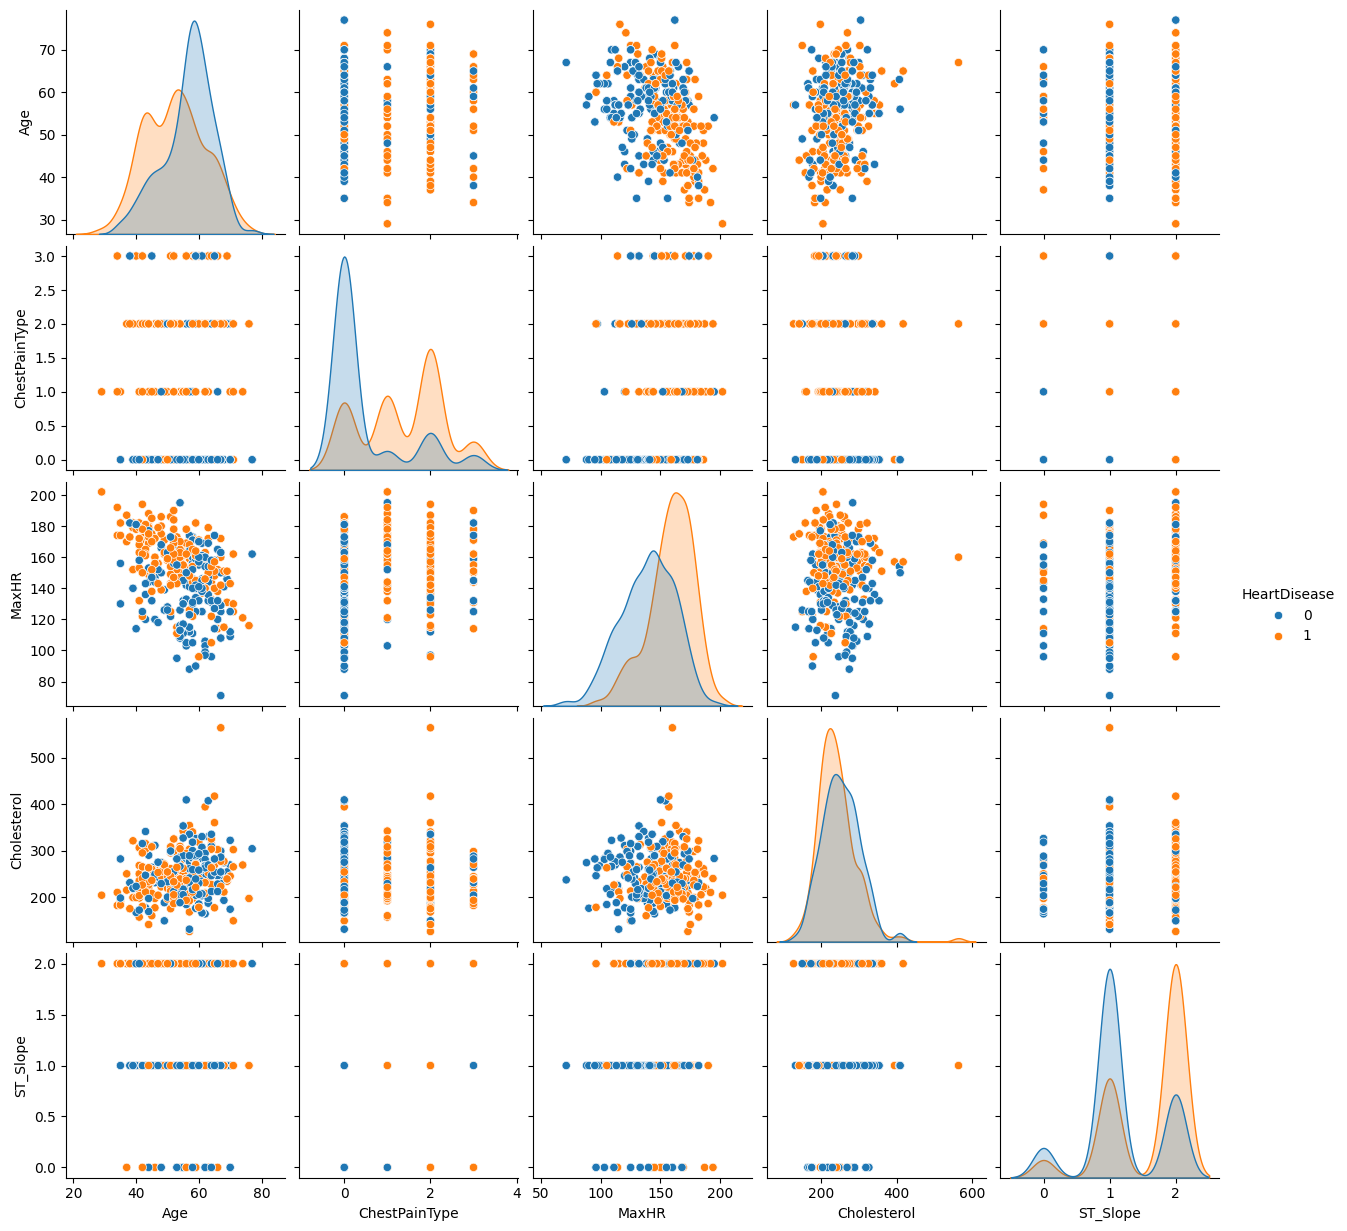

In [9]:
sns.pairplot(
    data[['Age','ChestPainType','MaxHR','Cholesterol','ST_Slope','HeartDisease']], 
    hue='HeartDisease'
)
plt.show()


In [10]:
cols = ['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']
                                                      #Check for outliers
outliers = {}
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers filter
    outlier_points = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    
    outliers[col] = outlier_points

    print(f"\n{col} => Outliers count: {len(outlier_points)}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Cholesterol => Outliers count: 16
Lower Bound: 115.0, Upper Bound: 371.0

RestingBP => Outliers count: 30
Lower Bound: 90.0, Upper Bound: 170.0

MaxHR => Outliers count: 4
Lower Bound: 81.0, Upper Bound: 217.0

Oldpeak => Outliers count: 7
Lower Bound: -2.7, Upper Bound: 4.5


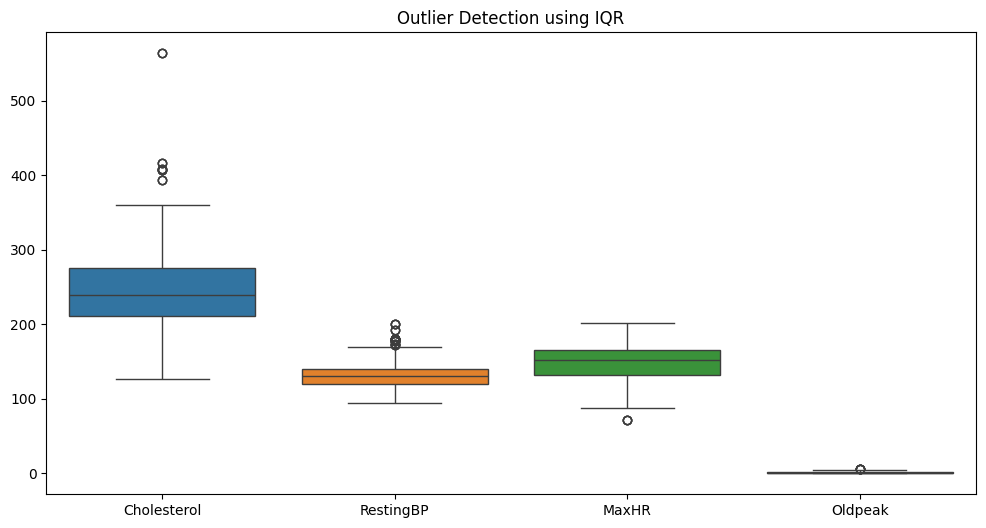

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[cols])
plt.title("Outlier Detection using IQR")
plt.show()

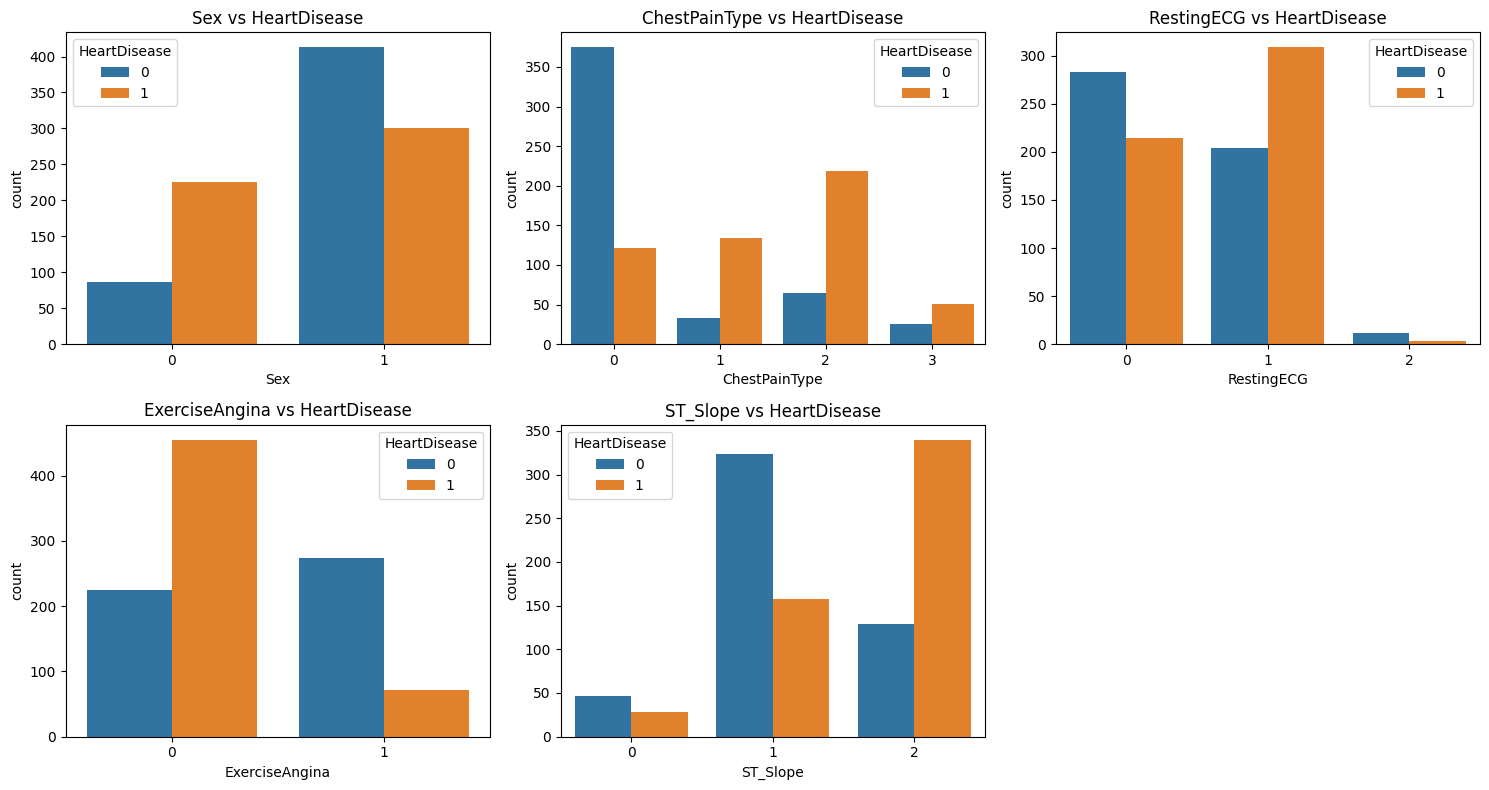

In [12]:
cat_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='HeartDisease', data=data)
    plt.title(f"{col} vs HeartDisease")
plt.tight_layout()
plt.show()


In [13]:
# Check skewness of continuous features
data[['Cholesterol','RestingBP','MaxHR','Oldpeak']].skew()


Cholesterol    1.074073
RestingBP      0.739768
MaxHR         -0.513777
Oldpeak        1.210899
dtype: float64

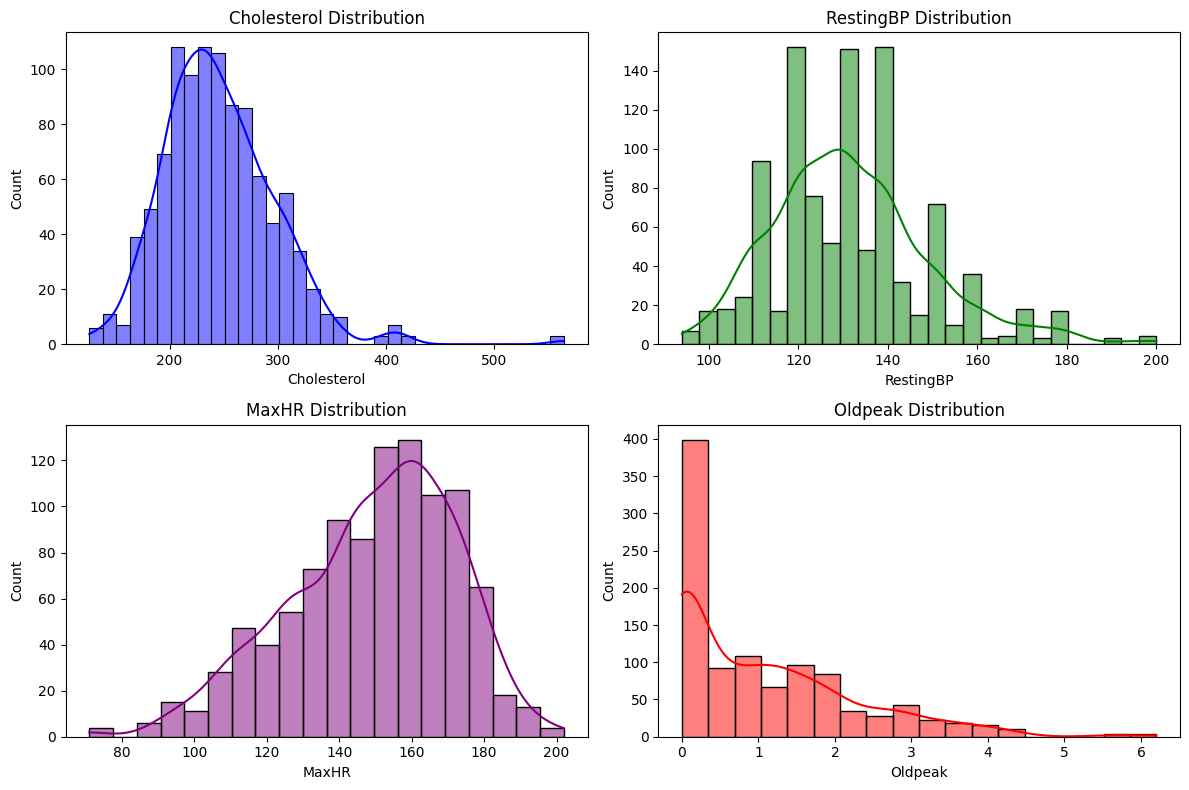

In [14]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.histplot(data['Cholesterol'], kde=True, ax=axes[0,0], color="blue")
axes[0,0].set_title("Cholesterol Distribution")

sns.histplot(data['RestingBP'], kde=True, ax=axes[0,1], color="green")
axes[0,1].set_title("RestingBP Distribution")

sns.histplot(data['MaxHR'], kde=True, ax=axes[1,0], color="purple")
axes[1,0].set_title("MaxHR Distribution")

sns.histplot(data['Oldpeak'], kde=True, ax=axes[1,1], color="red")
axes[1,1].set_title("Oldpeak Distribution")

plt.tight_layout()
plt.show()


Cholesterol → Slight right skew.

RestingBP → Near normal, slight right skew.

MaxHR → Slight left skew.

Oldpeak → Strong right skew (needs transformation like log/sqrt if required).

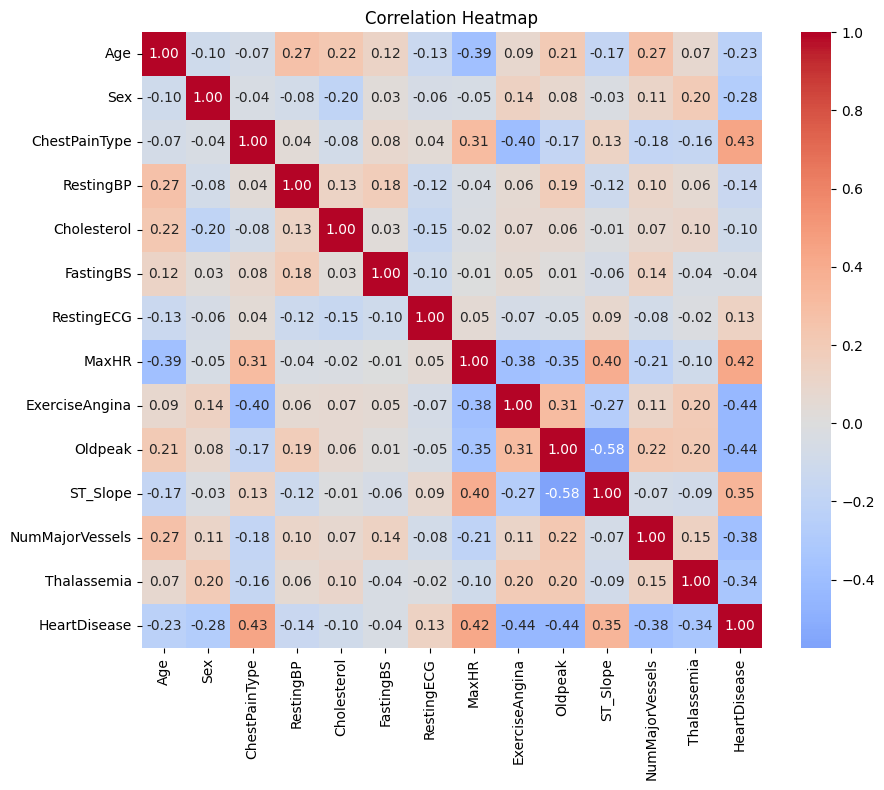

In [15]:
corr = data.corr()                    #Corelation btw features and target

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

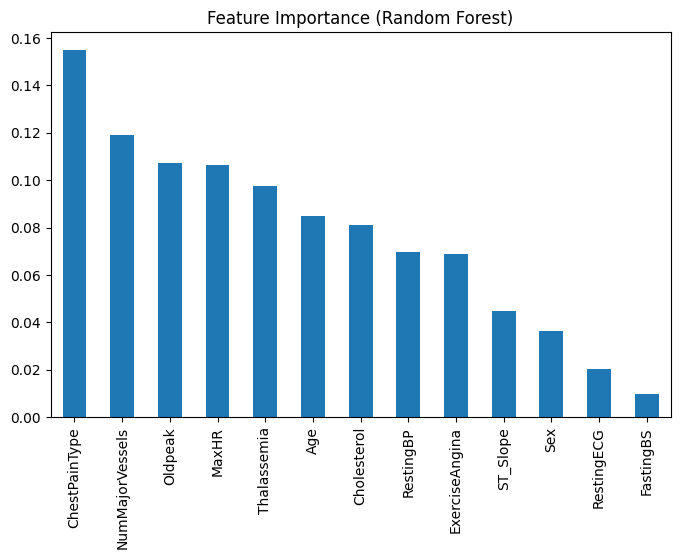

ChestPainType      0.154731
NumMajorVessels    0.118985
Oldpeak            0.107097
MaxHR              0.106239
Thalassemia        0.097750
Age                0.084991
Cholesterol        0.081245
RestingBP          0.069556
ExerciseAngina     0.068815
ST_Slope           0.044625
Sex                0.036224
RestingECG         0.020124
FastingBS          0.009619
dtype: float64


In [16]:
from sklearn.ensemble import RandomForestClassifier



# Features and target
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

# Train Random Forest
rf = RandomForestClassifier(random_state=45)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()

print(importances)


In [17]:
from sklearn.preprocessing import LabelEncoder


cat_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
X_cat = data[cat_features]
y = data["HeartDisease"]


le = LabelEncoder()          # Encode categorical columns
X_cat_encoded = X_cat.apply(le.fit_transform)


In [18]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


# Assuming X_cat = categorical features (after encoding), y = target
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y)

chi2_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Score': chi2_selector.scores_,
    'p-value': chi2_selector.pvalues_
}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_scores)


          Feature  Chi2 Score       p-value
1   ChestPainType  217.823922  2.698064e-49
3  ExerciseAngina  130.470927  3.232318e-30
4        ST_Slope   33.673948  6.516763e-09
0             Sex   24.373650  7.934661e-07
2      RestingECG    9.739343  1.803654e-03


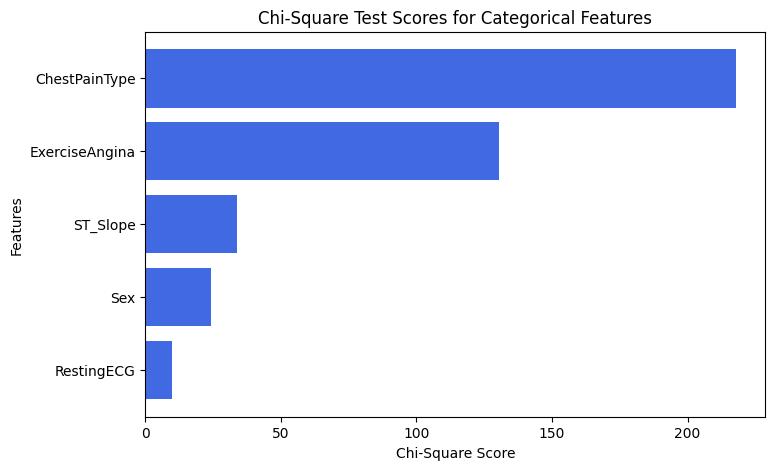

In [19]:
import matplotlib.pyplot as plt
import pandas as pd


chi2_results = pd.DataFrame({
    "Feature": ["ChestPainType", "ExerciseAngina", "ST_Slope", "Sex", "RestingECG"],
    "Chi2 Score": [217.823922, 130.470927, 33.673948, 24.373650, 9.739343],
    "p-value": [2.698064e-49, 3.232318e-30, 6.516763e-09, 7.934661e-07, 1.803654e-03]
})


chi2_results = chi2_results.sort_values("Chi2 Score", ascending=False)


plt.figure(figsize=(8, 5))
plt.barh(chi2_results["Feature"], chi2_results["Chi2 Score"], color="royalblue")
plt.xlabel("Chi-Square Score")
plt.ylabel("Features")
plt.title("Chi-Square Test Scores for Categorical Features")
plt.gca().invert_yaxis() 
plt.show()


In [20]:
from sklearn.feature_selection import f_classif
import pandas as pd


X_num = data.select_dtypes(include=['int64', 'float64'])         # Select only numeric features
y = data['HeartDisease']  # target


f_values, p_values = f_classif(X_num, y)    # Perform ANOVA F-test

anova_data = pd.DataFrame({
    'Feature': X_num.columns,
    'F-Score': f_values,
    'p-value': p_values
}).sort_values(by="F-Score", ascending=False)

print(anova_data)


            Feature     F-Score       p-value
13     HeartDisease         inf  0.000000e+00
9           Oldpeak  243.450780  2.141338e-49
8    ExerciseAngina  242.883889  2.694932e-49
2     ChestPainType  238.558457  1.563206e-48
7             MaxHR  222.799538  9.962971e-46
11  NumMajorVessels  174.877078  5.699148e-37
10         ST_Slope  138.679393  4.122053e-30
12      Thalassemia  131.802996  8.781192e-29
1               Sex   86.689707  7.523831e-20
0               Age   56.785135  1.067722e-13
3         RestingBP   20.087353  8.233015e-06
6        RestingECG   18.838205  1.564103e-05
4       Cholesterol   10.326152  1.352571e-03
5         FastingBS    1.736352  1.878967e-01


e:\Project_Exhibition\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [21]:
from sklearn.feature_selection import mutual_info_classif

# Apply MI
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by="MI Score", ascending=False)

print(mi_df)


            Feature  MI Score
4       Cholesterol  0.262750
7             MaxHR  0.159972
9           Oldpeak  0.146801
2     ChestPainType  0.138018
11  NumMajorVessels  0.125710
12      Thalassemia  0.119573
8    ExerciseAngina  0.095770
10         ST_Slope  0.093723
0               Age  0.059207
3         RestingBP  0.053572
1               Sex  0.049434
6        RestingECG  0.034383
5         FastingBS  0.024935


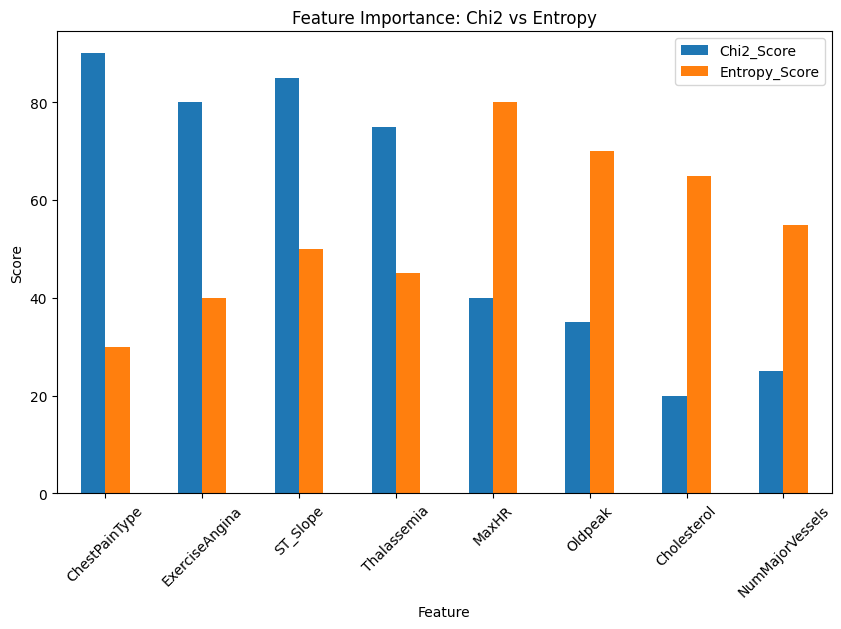

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


chi2_scores = {
    "ChestPainType": 90,
    "ExerciseAngina": 80,
    "ST_Slope": 85,
    "Thalassemia": 75,
    "MaxHR": 40,
    "Oldpeak": 35,
    "Cholesterol": 20,
    "NumMajorVessels": 25
}

entropy_scores = {
    "ChestPainType": 30,
    "ExerciseAngina": 40,
    "ST_Slope": 50,
    "Thalassemia": 45,
    "MaxHR": 80,
    "Oldpeak": 70,
    "Cholesterol": 65,
    "NumMajorVessels": 55
}

# Convert to DataFrame
df = pd.DataFrame({
    "Feature": chi2_scores.keys(),
    "Chi2_Score": chi2_scores.values(),
    "Entropy_Score": entropy_scores.values()
})

# Plot
df.plot(x="Feature", kind="bar", figsize=(10,6))
plt.ylabel("Score")
plt.title("Feature Importance: Chi2 vs Entropy")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# First  Split into train(60%), and temp(40%)
#Then temp(40%) into validate and test 20% each
#sklearn can't divide in 3 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the Data  for logistic regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1500),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

# Training & Validation
for name, model in models.items():
    if name in ["Logistic Regression", "SVM","KNN","Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

    accuracy  = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    print(f"{name}:\n Accuracy= {accuracy :.4f}")
    print(f"  Precision = { precision:.4f}")
    print(f"  Recall = {recall:.4f}\n")



Logistic Regression:
 Accuracy= 0.8195
  Precision = 0.7931
  Recall = 0.8762

Random Forest:
 Accuracy= 0.9854
  Precision = 1.0000
  Recall = 0.9714

SVM:
 Accuracy= 0.9268
  Precision = 0.8947
  Recall = 0.9714

Decision Tree:
 Accuracy= 0.9659
  Precision = 0.9804
  Recall = 0.9524

KNN:
 Accuracy= 0.8439
  Precision = 0.8288
  Recall = 0.8762

Naive Bayes:
 Accuracy= 0.8244
  Precision = 0.8165
  Recall = 0.8476

XGBoost:
 Accuracy= 0.9707
  Precision = 1.0000
  Recall = 0.9429



CONFUSION MATRIX



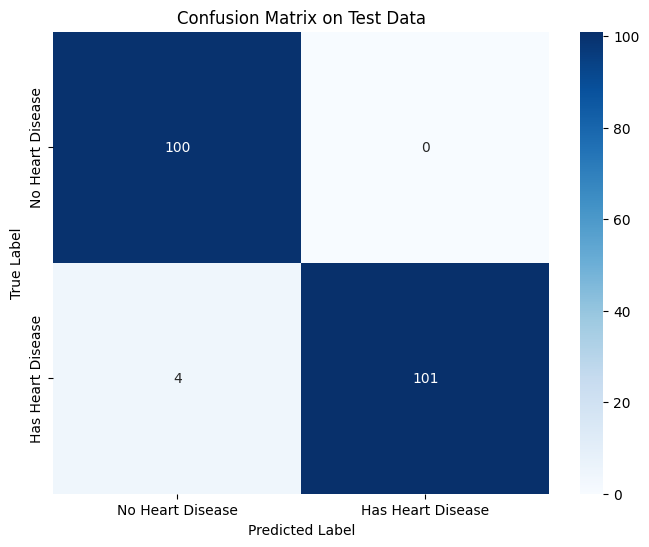


Classification Report on Test Data:

                   precision    recall  f1-score   support

 No Heart Disease       0.96      1.00      0.98       100
Has Heart Disease       1.00      0.96      0.98       105

         accuracy                           0.98       205
        macro avg       0.98      0.98      0.98       205
     weighted avg       0.98      0.98      0.98       205


ROC CURVE

AUC Score: 0.9963


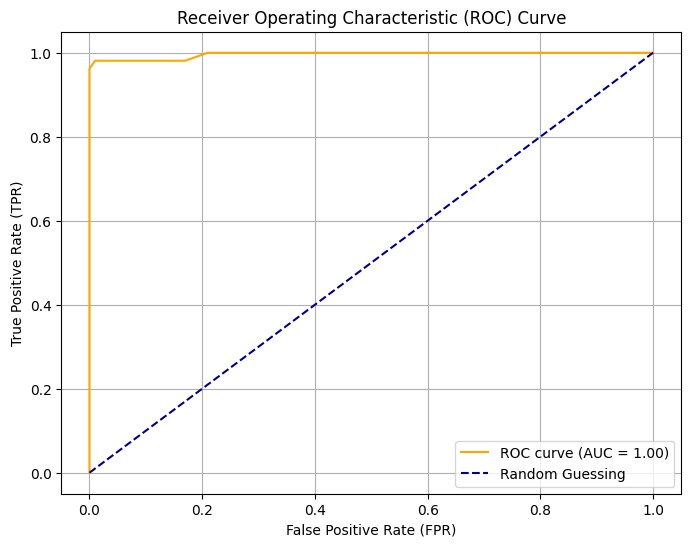

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report


rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train, y_train)

# TEST data 
y_pred_test = rf_model.predict(X_test)
y_pred_proba_test = rf_model.predict_proba(X_test)[:, 1] # Probabilities for ROC curve

#  CONFUSION MATRIX

print("================================================================")
print("CONFUSION MATRIX\n")

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Has Heart Disease'],
            yticklabels=['No Heart Disease', 'Has Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')
plt.show()

#  classification report 
print("\nClassification Report on Test Data:\n")
print(classification_report(y_test, y_pred_test, target_names=['No Heart Disease', 'Has Heart Disease']))
print("================================================================")


# ROC CURVE

print("\nROC CURVE\n")

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba_test)
print(f'AUC Score: {auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
print("================================================================")

In [ ]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your preprocessed DataFrame
# Make sure your original 'data' DataFrame has all the columns from the dataset

# --- THIS IS THE MOST IMPORTANT STEP ---
# Define the features you want to keep
final_features = [
    "Age",
    "Sex",
    "RestingBP",
    "Cholesterol",
    "MaxHR",
   # "Oldpeak",
    "ChestPainType",
    "ExerciseAngina",
    "ST_Slope",
    "NumMajorVessels",
    "Thalassemia"
]

# Create the feature set (X) and target (y) with only the FINAL features
X = data[final_features]
y = data["HeartDisease"]

# Split the data into training and testing sets
# The X_train variable will now only contain the final_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train your best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)


# Save the trained model to a file
# This model is now trained ONLY on your 11 chosen features
joblib.dump(best_model, 'heart_disease_model.joblib')

print("Model saved as heart_disease_model.joblib")
print("Number of features in the saved model:", best_model.n_features_in_)